<a href="https://colab.research.google.com/github/goitstudent123/python_data_science/blob/main/%D0%94%D0%978-%D0%93%D0%90%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Завдання 1**

Візьми код симуляції із завдання 7 домашнього завдання до теми 7 “Теорія ймовірностей. Комбінаторика”. Будемо вважати, що зміна ціни акцій у кожний момент часу дорівнює
x∼Γ(0.3,1.1), де Г — позначення гамма-розподілу.
Необхідно запустити симуляцію
n=100 разів для різних значень часу t.

а) Побудуй гістограму розподілу x


б) Запусти симуляцію з t від 1 до, наприклад, ~60 з кроком, наприклад, 1 або 2.

Примітка: кінцеве значення t взято умовно рівним 60, але це не відіграє великої ролі, головне, щоб воно було достатнім для проходження тесту на нормальність, а значення кроку — дозволяло побачити динаміку зміни розподілу. Конкретні значення не так важливі.

Для кожного значення t побудуй гістограму розподілу ціни та перевір його на нормальність. Зроби висновки про зміну розподілу зі збільшенням t.


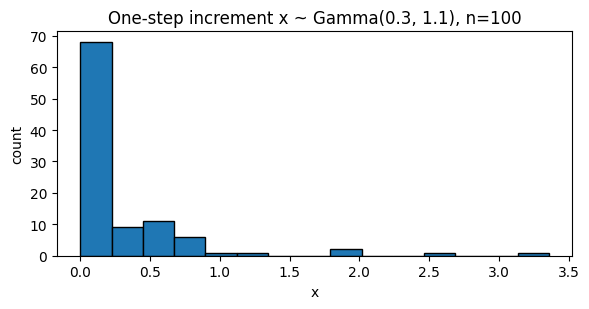

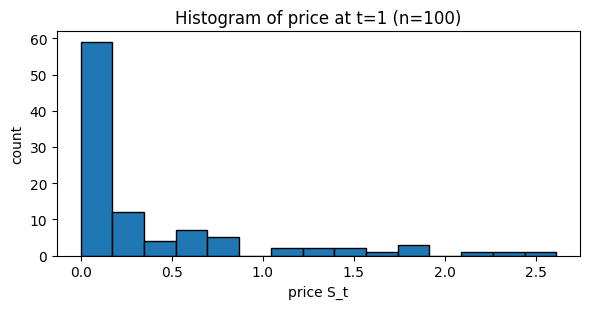

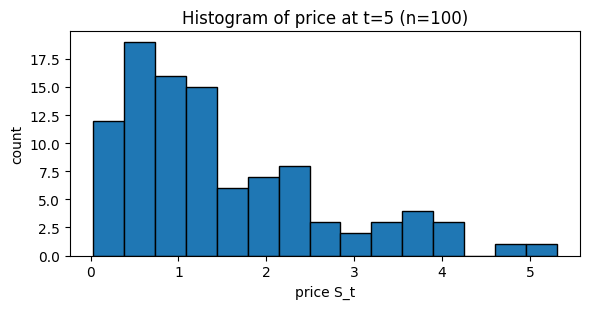

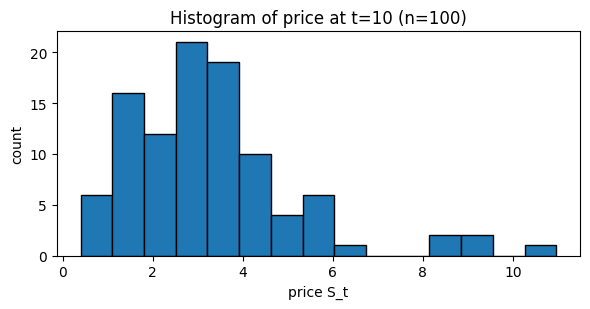

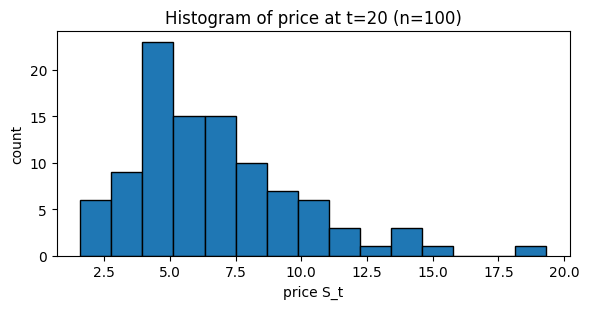

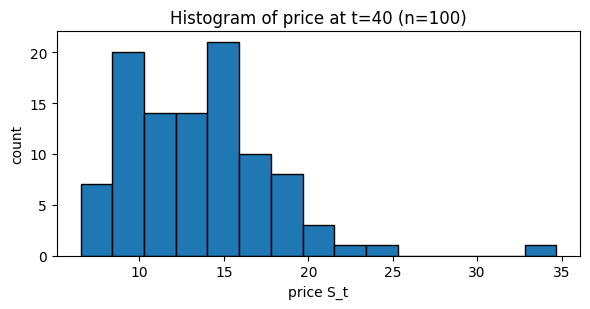

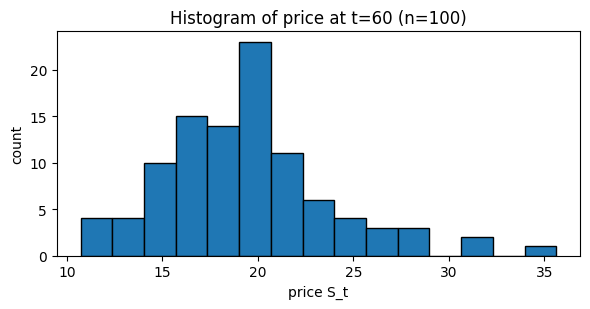

Simulation complete. Summary saved to gamma_normality_summary.csv


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

# --- parameters ---
alpha = 0.3       # gamma shape
theta = 1.1       # gamma scale
n = 100           # number of simulations per t
t_max = 60        # max t to simulate
rng = np.random.default_rng(42)

# --- Jarque–Bera test helper ---
def jb_test(sample):
    s = pd.Series(sample)
    m = s.mean()
    v = s.var(ddof=1)
    z = (s - m) / sqrt(v)
    skew = (z**3).mean()
    kurt = (z**4).mean() - 3.0  # excess kurtosis
    jb = len(s)/6.0 * (skew**2 + (kurt**2)/4.0)
    normal = jb < 5.99  # critical value for alpha=0.05, df=2
    return skew, kurt, jb, normal

# --- (a) Histogram for one-step increment x ---
x = rng.gamma(shape=alpha, scale=theta, size=n)
plt.figure(figsize=(6,3.2))
plt.hist(x, bins=15, edgecolor="black")
plt.title("One-step increment x ~ Gamma(0.3, 1.1), n=100")
plt.xlabel("x")
plt.ylabel("count")
plt.tight_layout()
plt.show()

# --- (b) Simulation for t=1..t_max ---
results = []
selected_ts = [1, 5, 10, 20, 40, 60]

for t in range(1, t_max+1):
    # Sum of t iid Gammas => Gamma(shape = alpha*t, scale = theta)
    s_t = rng.gamma(shape=alpha*t, scale=theta, size=n)

    mean = s_t.mean()
    var = s_t.var(ddof=1)
    skew, kurt_excess, jb, normal = jb_test(s_t)

    results.append({
        "t": t,
        "mean": mean,
        "variance": var,
        "skewness": skew,
        "kurtosis_excess": kurt_excess,
        "JB": jb,
        "JB_normal_at_0.05": normal
    })

    # plot histogram for selected t values
    if t in selected_ts:
        plt.figure(figsize=(6,3.2))
        plt.hist(s_t, bins=15, edgecolor="black")
        plt.title(f"Histogram of price at t={t} (n=100)")
        plt.xlabel("price S_t")
        plt.ylabel("count")
        plt.tight_layout()
        plt.show()

# --- Save results ---
df = pd.DataFrame(results)
df.to_csv("gamma_normality_summary.csv", index=False)

print("Simulation complete. Summary saved to gamma_normality_summary.csv")

**Висновки:**


- При одному кроці зміна ціни 𝑥∼Γ(0.3,1.1) має сильну праву скісність і довгий хвіст, тому розподіл далекий від нормального.

- Коли ми збільшуємо кількість кроків t, середнє значення і дисперсія ціни ростуть пропорційно t, а скісність зменшується приблизно як
2/sqr(𝑡*𝛼).


- На малих t розподіл залишається асиметричним і гостровершинним, але вже на середніх значеннях (≈30−40 кроків) він стає візуально схожим на нормальний і проходить перевірку JB-тестом на рівні значущості 0.05.

- Це добре узгоджується з центральною граничною теоремою — при збільшенні t сума незалежних інкрементів наближається до нормального розподілу.


**Завдання 2**

Завантаж набір даних [Product Advertising Data](https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit?gid=954244094#gid=954244094). Набір даних складається із семи стовпчиків, що відображають витрати на рекламу на різних платформах — телебачення, білборди, Google Ads, соціальні медіа, інфлюенс-маркетинг та партнерський маркетинг.


Останній стовпчик, "Product_Sold", містить кількісну оцінку відповідної кількості проданих одиниць товару. Для кожної колонки порахуй середнє значення, дисперсію, стандартне відхилення, побудуй гістограму розподілу показника, перевір на нормальність розподілу та порахуй кореляцію з Product_Sold.

                 Column         Mean      Variance       StdDev  Skewness  \
0                    TV   517.431000  8.301013e+04   288.114792  0.008746   
1            Billboards   502.644933  7.608901e+04   275.842369 -0.059327   
2            Google_Ads   512.444133  8.146593e+04   285.422376 -0.062412   
3          Social_Media   489.800100  7.501240e+04   273.883915  0.044371   
4  Influencer_Marketing   465.732567  8.312501e+04   288.314080  0.112516   
5   Affiliate_Marketing   484.430633  7.725924e+04   277.955458  0.098598   
6          Product_Sold  7031.523333  2.902304e+06  1703.614951 -0.047200   

   Kurtosis_Excess         JB  JB_Normal_at_0.05  \
0        -1.203257  18.101674              False   
1        -1.177486  17.506895              False   
2        -1.213517  18.602546              False   
3        -1.088473  14.908096              False   
4        -1.195108  18.486533              False   
5        -1.152994  17.103515              False   
6        -0.118420 

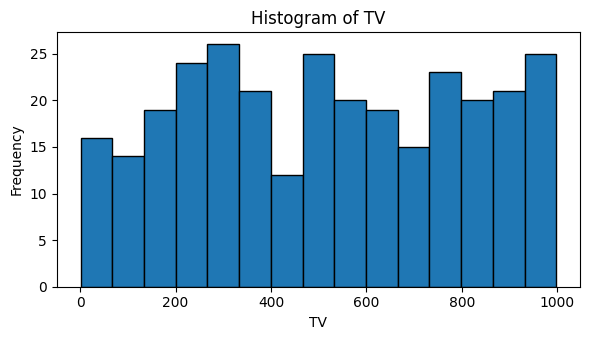

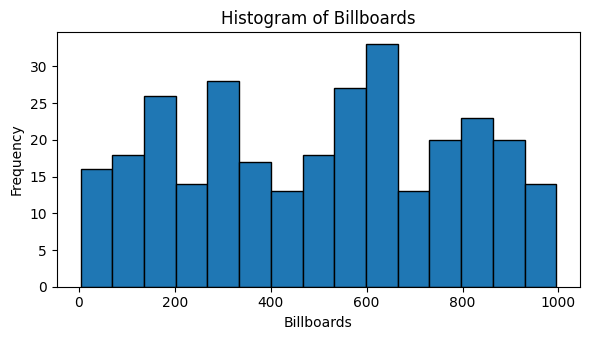

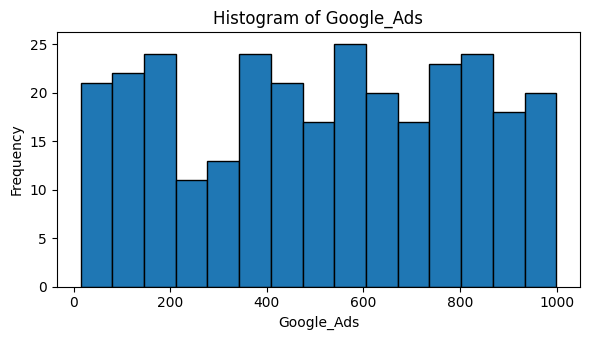

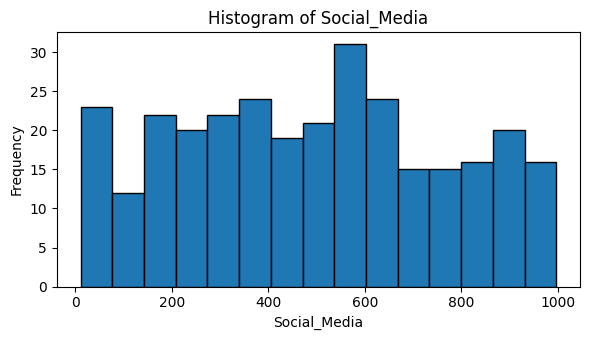

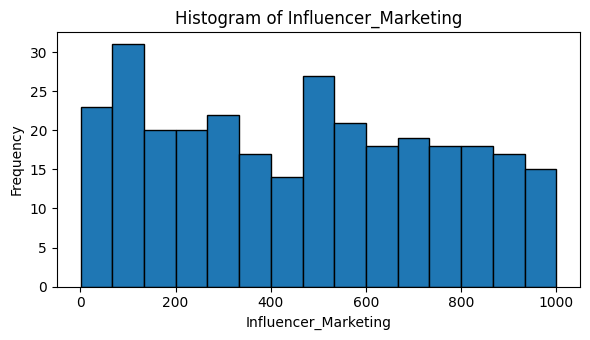

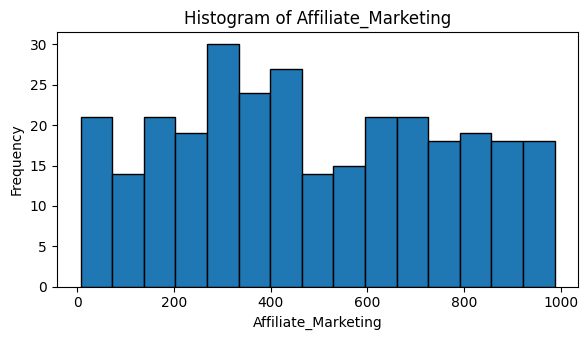

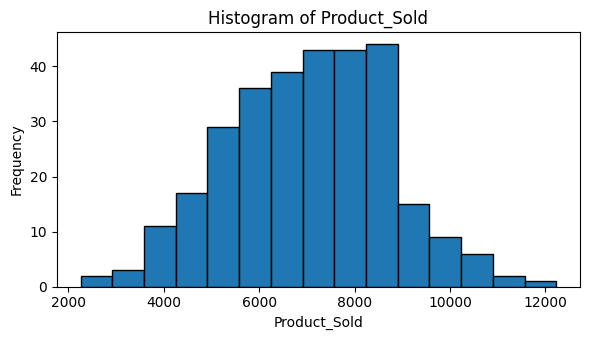

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# fetch data
url = "https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/export?format=csv&gid=954244094"
df = pd.read_csv(url)

# stats
summary = []
target_col = "Product_Sold"

for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        mean = df[col].mean()
        var = df[col].var(ddof=1)
        std = df[col].std(ddof=1)
        skew, kurt_excess, jb, normal = jb_test(df[col])
        corr = None
        if col != target_col:
            corr = df[col].corr(df[target_col])
        summary.append({
            "Column": col,
            "Mean": mean,
            "Variance": var,
            "StdDev": std,
            "Skewness": skew,
            "Kurtosis_Excess": kurt_excess,
            "JB": jb,
            "JB_Normal_at_0.05": normal,
            "Correlation_with_Product_Sold": corr
        })

summary_df = pd.DataFrame(summary)
print(summary_df)

# histograms
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        plt.figure(figsize=(6,3.5))
        plt.hist(df[col], bins=15, edgecolor="black")
        plt.title(f"Histogram of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()


Гістограми показують, що розподіл витрат на рекламу по більшості каналів далекий від нормального — часто спостерігається асиметрія та довгі хвости. Це свідчить про наявність викидів і різке коливання бюджетів, що може впливати на стабільність кореляцій із продажами. Для моделювання варто розглянути трансформацію даних або окремий аналіз каналів із надто перекошеним розподілом.